In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
eventsData = pd.read_csv("data/events_up_to_01062018.csv",low_memory = False)

In [3]:
trainingSet = pd.read_csv("data/labels_training_set.csv", low_memory = False)

In [4]:
kaggle_test = pd.read_csv("data/trocafone_kaggle_test.csv", low_memory = False)

Analisis de los set de datos

In [5]:
eventsData.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
trainingSet.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [7]:
kaggle_test.head()

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


Analisis de training set

In [8]:
trainingSet["label"].value_counts()

0    18434
1      980
Name: label, dtype: int64

In [9]:
trainingSet["index"] = trainingSet.index

In [10]:
trainingSet.head()

,person,label,index
0,0566e9c1,0,0
1,6ec7ee77,0,1
2,abe7a2fb,0,2
3,34728364,0,3
4,87ed62de,0,4


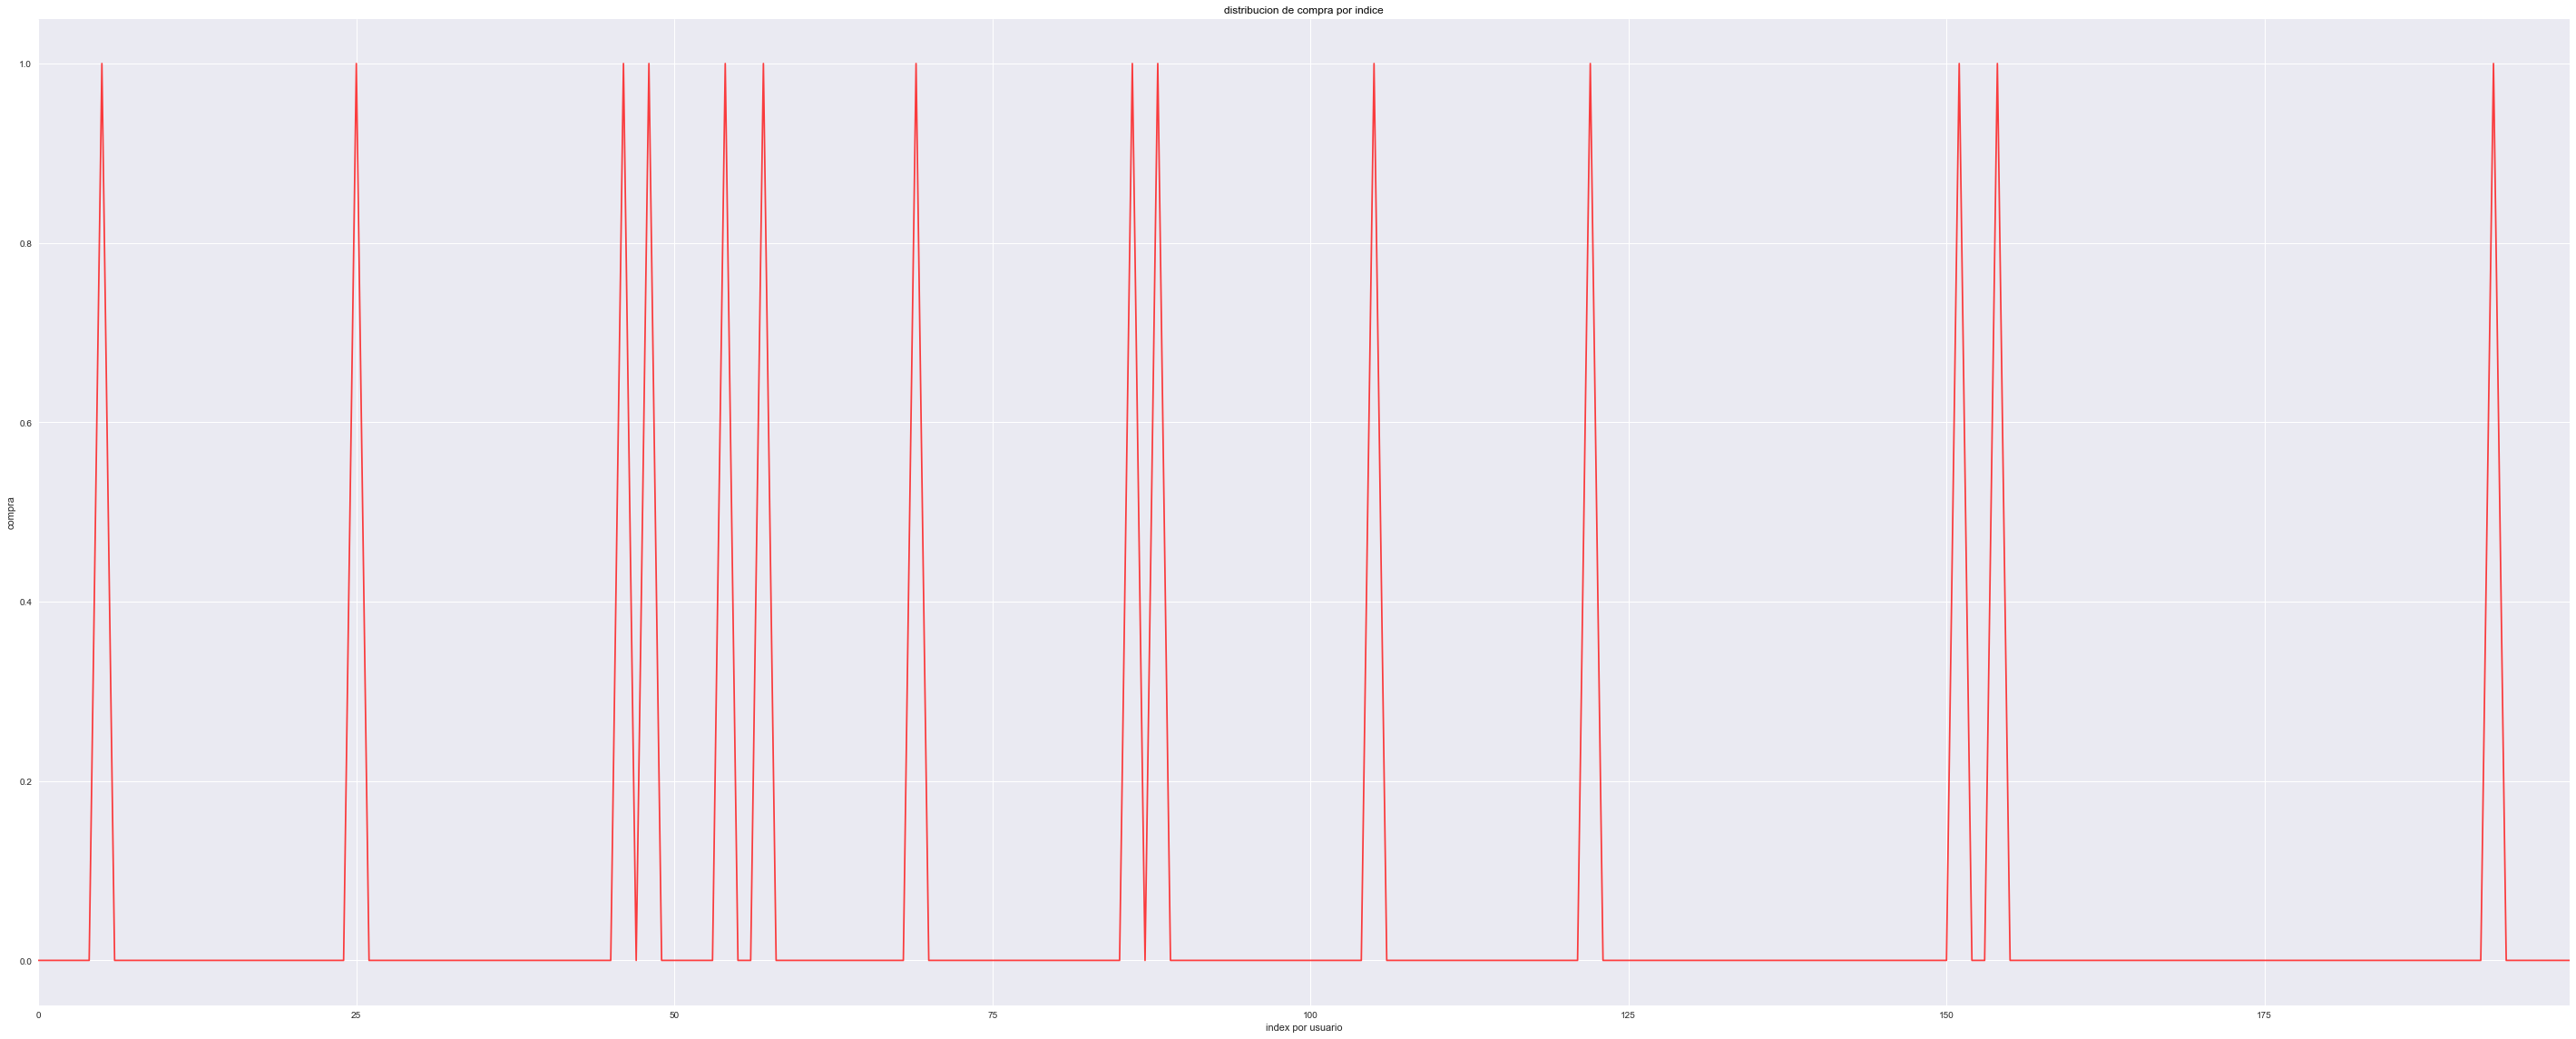

In [11]:
f = plt.figure()

plt.title ('distribucion de compra por indice',color='black')

ax = trainingSet["label"][0:200].plot(kind='line', figsize=(50,20) ,alpha=0.75, ax=f.gca(), color='red' )


ax.set_xlabel('index por usuario')
ax.set_ylabel("compra")
plt.show()

#plt.savefig('Topeventoslog',bbox_inches='tight')




In [12]:
trainingSet = trainingSet.drop("index",axis=1)

In [13]:
trainingSet["person"].count()

19414

In [14]:
kaggle_test["person"].count()

19415

In [15]:
kaggle_test.head()

,person
0,4886f805
1,0297fc1e
2,2d681dd8
3,cccea85e
4,4c8a8b93


In [16]:
trainingSet.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [17]:
mergeKaggleAndTraining = pd.merge(trainingSet,kaggle_test,how ="inner", on= "person")

In [18]:
mergeKaggleAndTraining.head()

,person,label


In [19]:
eventsData["person"].count()

2341681

In [20]:
mergeKaggleAndEvents =pd.merge(eventsData,kaggle_test,how ="inner", on= "person")

In [21]:
mergeKaggleAndEvents.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:30:30,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:07:23,search engine hit,4886f805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Google,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:56,checkout,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:35,viewed product,4886f805,NaN,9287.0,Samsung Galaxy J7 Prime,Muito Bom,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analisis nacionalidad de las personas que hay que predecir 

In [22]:
DataTest = pd.merge(kaggle_test,eventsData, how= "inner", on= "person")

In [23]:
DataTest["country"].count()

101770

In [26]:
DataTest["country"].value_counts().head() #La mayoria es de brasil

Brazil           98539
Unknown           2686
United States      335
Argentina           45
Canada              31
Name: country, dtype: int64

Analisis de skus

In [29]:
eventsData[eventsData["event"] == "searched products"].head() #El evento searched productos es el unico que tiene la columna skus

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
5,2018-05-18 00:44:27,searched products,4c8a8b93,NaN,NaN,NaN,NaN,NaN,NaN,"10240,9987,10322,10085,9944,9931,13404,10154,1...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,2018-05-18 00:37:16,searched products,29ebb414,NaN,NaN,NaN,NaN,NaN,NaN,"3371,6357,6371,3191,2718,6001,2777,6248,2725,8...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2018-05-18 00:29:48,searched products,15ea8012,NaN,NaN,NaN,NaN,NaN,NaN,"12786,12800,12772",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,2018-05-18 00:28:57,searched products,d21b8e6b,NaN,NaN,NaN,NaN,NaN,NaN,"5016,5088,8397,8429,10728,5075,7631,9216,4969,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2018-05-18 00:28:14,searched products,d21b8e6b,NaN,NaN,NaN,NaN,NaN,NaN,"12520,12507,12548,12534",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
datosSinSkus = eventsData[eventsData["event"] != "searched products"]

In [31]:
personsSinSkus = datosSinSkus.drop_duplicates("person",keep="first")

In [35]:
pd.merge(personsSinSkus,kaggle_test,on="person",how = "inner")["person"].count()

19415

In [36]:
kaggle_test["person"].count()

19415

In [44]:
datosSinCampanias = personsSinSkus[personsSinSkus["event"] != "ad campaign hit"]

In [45]:
pd.merge(datosSinCampanias,kaggle_test,on="person",how = "inner")["person"].count()

15358

pierdo datos aca

In [46]:
 eventsData[eventsData["event"] == "searched products"]["person"].count()

130616

Veo que datos me dan los tipos de eventos

In [47]:
eventsData["event"].value_counts()

viewed product       1248124
brand listing         216312
visited site          204069
ad campaign hit       191388
generic listing       160176
searched products     130616
search engine hit     106406
checkout               65315
staticpage             11201
conversion              7091
lead                     983
Name: event, dtype: int64

In [49]:
eventsData[eventsData["event"] == "brand listing"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216312 entries, 1760143 to 2136628
Data columns (total 23 columns):
timestamp                   216312 non-null object
event                       216312 non-null object
person                      216312 non-null object
url                         0 non-null object
sku                         0 non-null float64
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        215553 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non

In [50]:
eventsData[eventsData["event"] == "generic listing"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160176 entries, 1760141 to 2136620
Data columns (total 23 columns):
timestamp                   160176 non-null object
event                       160176 non-null object
person                      160176 non-null object
url                         0 non-null object
sku                         0 non-null float64
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        159805 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non

In [51]:
eventsData[eventsData["event"] == "staticpage"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11201 entries, 25 to 1759705
Data columns (total 23 columns):
timestamp                   11201 non-null object
event                       11201 non-null object
person                      11201 non-null object
url                         0 non-null object
sku                         0 non-null float64
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        261 non-null object
search_term                 0 non-null object
staticpage                  11201 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null ob

In [52]:
eventsData[eventsData["event"] == "lead"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 2340698 to 2341680
Data columns (total 23 columns):
timestamp                   983 non-null object
event                       983 non-null object
person                      983 non-null object
url                         0 non-null object
sku                         0 non-null float64
model                       983 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-null object
de

In [53]:
eventsData[eventsData["event"] == "checkout"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65315 entries, 33 to 1760076
Data columns (total 23 columns):
timestamp                   65315 non-null object
event                       65315 non-null object
person                      65315 non-null object
url                         0 non-null object
sku                         65315 non-null float64
model                       65315 non-null object
condition                   65315 non-null object
storage                     65315 non-null object
color                       65315 non-null object
skus                        1160 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                 

In [54]:
eventsData[eventsData["event"] == "visited site"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204069 entries, 2136629 to 2340697
Data columns (total 23 columns):
timestamp                   204069 non-null object
event                       204069 non-null object
person                      204069 non-null object
url                         0 non-null object
sku                         0 non-null float64
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     204069 non-null object
new_vs_returning            204069 non-null object
city                        204069 non-null object
region                      204069 non-null object
country           

In [55]:
eventsData[eventsData["event"] == "viewed product"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248124 entries, 0 to 1760140
Data columns (total 23 columns):
timestamp                   1248124 non-null object
event                       1248124 non-null object
person                      1248124 non-null object
url                         0 non-null object
sku                         1248124 non-null float64
model                       1248124 non-null object
condition                   1248124 non-null object
storage                     1248124 non-null object
color                       1248124 non-null object
skus                        20806 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
countr

In [56]:
eventsData[eventsData["event"] == "search engine hit"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106406 entries, 58 to 1760139
Data columns (total 23 columns):
timestamp                   106406 non-null object
event                       106406 non-null object
person                      106406 non-null object
url                         0 non-null object
sku                         0 non-null float64
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        2210 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             0 non-null object
search_engine               106406 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 non-n

Los eventos search engine hit,staticpage, generic list, brand list solo me dan informacion de los skus. lead me da informacion de modelo.